In [160]:
from pathlib import Path

import numpy as np
import pandas as pd
from pandas.api.types import is_integer_dtype
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

# from sklearn.metrics import roc_auc_score

plt.style.use("./auri.mplstyle")


In [29]:
df_orig = pd.read_parquet("output/data.parquet")
df_1 = df_orig[df_orig.fire == 1]
np.random.seed(1106)
df_0 = df_orig[df_orig.fire == 0].sample(n=len(df_1))
np.random.seed(1106)
df = pd.concat([df_1, df_0]).sample(frac=1).reset_index(drop=True)
df = df[
    [
        "A8",
        "A10",
        "A14",
        "A18",
        "A20",
        "gd_zone",
        "gg_zone",
        "jd_zone",
        "pr_zone",
        "si_zone",
        "crime_zone",
        "fire",
        "fire_1km_cnt",
        "fire_1km2_cnt",
        "fire_500m_cnt",
        "year",
    ]
]
np.random.seed(1106)
df["set"] = np.random.choice(
    ["train", "valid", "test"], p=[0.8, 0.1, 0.1], size=len(df)
)

train_idx = df[df.set == "train"].index
valid_idx = df[df.set == "valid"].index
test_idx = df[df.set == "test"].index

categorical_columns = ["A8", "A10", "A20", "fire"]

enc = OneHotEncoder(drop="if_binary")
enc = enc.fit(df[categorical_columns])

one_hot_cols = [
    f"{col_name}_{cat_name}"
    for col_name, cat_names in zip(categorical_columns, enc.categories_)
    for i, cat_name in enumerate(cat_names)
    if len(cat_names) != 2 or i != 0
]
df[one_hot_cols] = enc.transform(df[categorical_columns]).toarray()

display(df[categorical_columns].head(1))
display(pd.DataFrame(df[one_hot_cols].head(1)).transpose())


numerical_columns = [
    "A14",
    "A18",
    "fire_1km_cnt",
    "fire_1km2_cnt",
    "fire_500m_cnt",
    "crime_zone",
    "gd_zone",
    "gg_zone",
    "jd_zone",
    "pr_zone",
    "si_zone",
    "year",
]

df[numerical_columns] = df[numerical_columns].astype(float)
for col in numerical_columns:
    m_train = df.loc[train_idx, col].mean()
    m_valid = df.loc[valid_idx, col].mean()
    m_test = df.loc[test_idx, col].mean()
    df.loc[train_idx, col] = df.loc[train_idx, col].fillna(m_train)
    df.loc[valid_idx, col] = df.loc[valid_idx, col].fillna(m_valid)
    df.loc[test_idx, col] = df.loc[test_idx, col].fillna(m_test)


df = df[one_hot_cols + numerical_columns + ["set"]]

features = [col for col in df.columns if col not in ["set", "fire", "fire_1"]]

X_train = df[features].values[train_idx]
X_valid = df[features].values[valid_idx]
X_test = df[features].values[test_idx]

y_train = df["fire_1"].values[train_idx]
y_valid = df["fire_1"].values[valid_idx]
y_test = df["fire_1"].values[test_idx]


,A8,A10,A20,fire
0,01000,11,N,0


,0
A8_01000,1.0
A8_02000,0.0
A8_03000,0.0
A8_04000,0.0
A8_05000,0.0
A8_06000,0.0
A8_07000,0.0
A8_08000,0.0
A8_09000,0.0
A8_10000,0.0


In [32]:
df.head()


,A8_01000,A8_02000,A8_03000,A8_04000,A8_05000,A8_06000,A8_07000,A8_08000,A8_09000,A8_10000,...,fire_1km2_cnt,fire_500m_cnt,crime_zone,gd_zone,gg_zone,jd_zone,pr_zone,si_zone,year,set
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,102.0,85.0,0.001468,0.0,0.000000,0.000681,0.000787,0.0,1989.000000,train
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,5.0,0.000058,0.0,0.000000,0.000030,0.000028,0.0,1990.798931,train
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,33.0,0.000919,0.0,0.000000,0.000524,0.000395,0.0,2007.000000,test
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,19.0,0.002558,0.0,0.000042,0.001175,0.001340,0.0,1992.000000,valid
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,36.0,0.001417,0.0,0.000088,0.000458,0.000871,0.0,1991.000000,train


run 1: default -> a tree with 7579 leaves

In [58]:
np.random.seed(1106)
clf = DecisionTreeClassifier().fit(X_train, y_train)


In [59]:
clf.classes_


array([0., 1.])

In [60]:
clf.get_n_leaves()


7579

7천 개가 넘는 잎 노드(leaf nodes)를 가진 복잡한 구조로 인하여 모델의 구조를 이해하고 시사점을 얻을 수 있다는 의사결정나무의 장점이 희석됨.

In [66]:
clf.score(X_train, y_train)


0.6420710203088897

In [67]:
clf.score(X_valid, y_valid)


0.6092315128081198

화재 발생 확률을 1:1로 맞춘 표본에 대한 의사결정나무 학습 결과, 학습한 훈련 데이터에 대한 정확도는 64.2%로 나타났으나, 본 적 없는 검증 데이터에 대한 정확도는 60.9%로 낮게 나타남.
기게학습 모형이 데이터 전체에 적용될 수 없는 규칙을 학습하는 과적합(overfitting) 현상은 의사결정나무 뿐만 아니라 기계학습 방법론 전반에서 나타날 수 있는 문제로, 의사결정나무의 경우 학습 모형의 복잡도를 통제하는 방식으로 과적합을 방지함.

run 2: varying n of leaves

In [90]:
results = []

for n in range(2, 100 + 1, 2):
    np.random.seed(1106)
    clf = DecisionTreeClassifier(max_leaf_nodes=n).fit(X_train, y_train)
    results.append(
        (clf.get_n_leaves(), clf.score(X_train, y_train), clf.score(X_valid, y_valid))
    )

df_n_leaves = pd.DataFrame(results, columns=["n_of_leaves", "train_acc", "valid_acc"])
df_n_leaves.head(10)


,n_of_leaves,train_acc,valid_acc
0,2,0.583060,0.580957
1,4,0.611152,0.616481
2,6,0.611152,0.616481
3,8,0.612368,0.614548
4,10,0.612368,0.614548
5,12,0.613857,0.615031
6,14,0.616959,0.615998
7,16,0.620759,0.617206
8,18,0.620759,0.617206
9,20,0.621093,0.614306


In [91]:
df_n_leaves.valid_acc.argmax()


7

In [98]:
df_n_leaves.loc[df_n_leaves.valid_acc.argmax()]


n_of_leaves    16.000000
train_acc       0.620759
valid_acc       0.617206
Name: 7, dtype: float64

검증 데이터에 대해 가장 높은 정확도를 보이는 의사결정나무 모형의 크기는 잎 노드가 16개일 때이며,
이 때 검증 데이터에 대한 정확도는 61.7%로 훈련 데이터와 유사한 수준의 정확도를 보임

(0.0, 100.0)

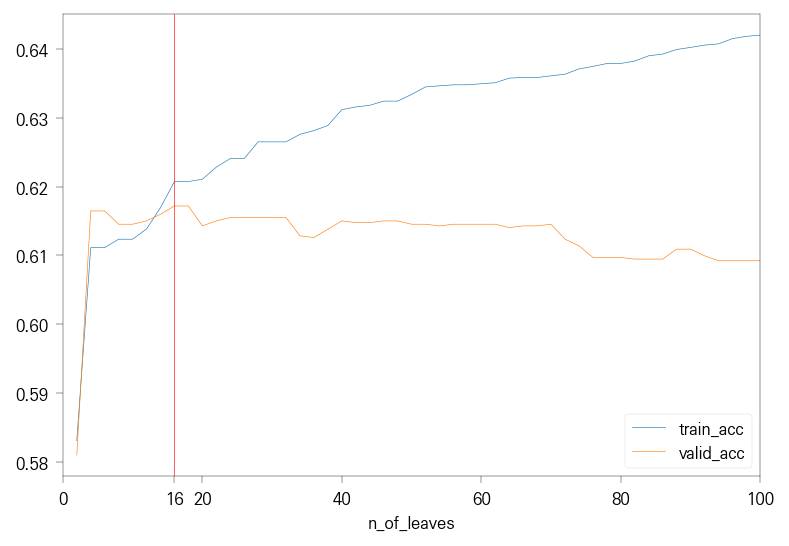

In [96]:
max_n = df_n_leaves.n_of_leaves[df_n_leaves.valid_acc.argmax()]
df_n_leaves.plot(x="n_of_leaves")
plt.axvline(max_n, color="r")
plt.xticks(list(range(0, 100 + 1, 20)) + [max_n])
plt.xlim(0, 100)


의사결정나무의 크기를 키울수록 훈련 데이터에 대한 정확도는 더욱 높아지지만 검증 데이터에 대한 정확도는 노드 4개 이후 크게 증가하지 않고 16개 이후로는 오히려 감소함.

In [100]:
np.random.seed(1106)
clf_best = DecisionTreeClassifier(max_leaf_nodes=max_n).fit(X_train, y_train)
clf_best.score(X_test, y_test)


0.6104325699745548

모형 크기 결정에도 사용하지 않은 시험 데이터에 대한 최종 정확도는 61.0%

In [109]:
labels = [
    "용도_01000",
    "용도_02000",
    "용도_03000",
    "용도_04000",
    "용도_05000",
    "용도_06000",
    "용도_07000",
    "용도_08000",
    "용도_09000",
    "용도_10000",
    "용도_11000",
    "용도_12000",
    "용도_13000",
    "용도_14000",
    "용도_15000",
    "용도_16000",
    "용도_17000",
    "용도_18000",
    "용도_19000",
    "용도_20000",
    "용도_21000",
    "용도_22000",
    "용도_23000",
    "용도_24000",
    "용도_25000",
    "용도_26000",
    "용도_27000",
    "용도_29000",
    "용도_Z3000",
    "용도_Z5000",
    "용도_Z6000",
    "용도_Z8000",
    "용도_None",
    "구조_11",
    "구조_12",
    "구조_13",
    "구조_19",
    "구조_21",
    "구조_22",
    "구조_26",
    "구조_29",
    "구조_31",
    "구조_32",
    "구조_33",
    "구조_39",
    "구조_41",
    "구조_42",
    "구조_49",
    "구조_50",
    "구조_51",
    "구조_52",
    "구조_61",
    "구조_74",
    "구조_99",
    "구조_None",
    "위반_N",
    "위반_Y",
    "위반_None",
    "연면적",
    "용적률",
    "반경 1km 화재",
    "주변 1km² 화재",
    "반경 500m 화재",
    "5대 범죄",
    "강도",
    "강간·강제추행",
    "절도",
    "폭력",
    "살인",
    "사용승인",
]


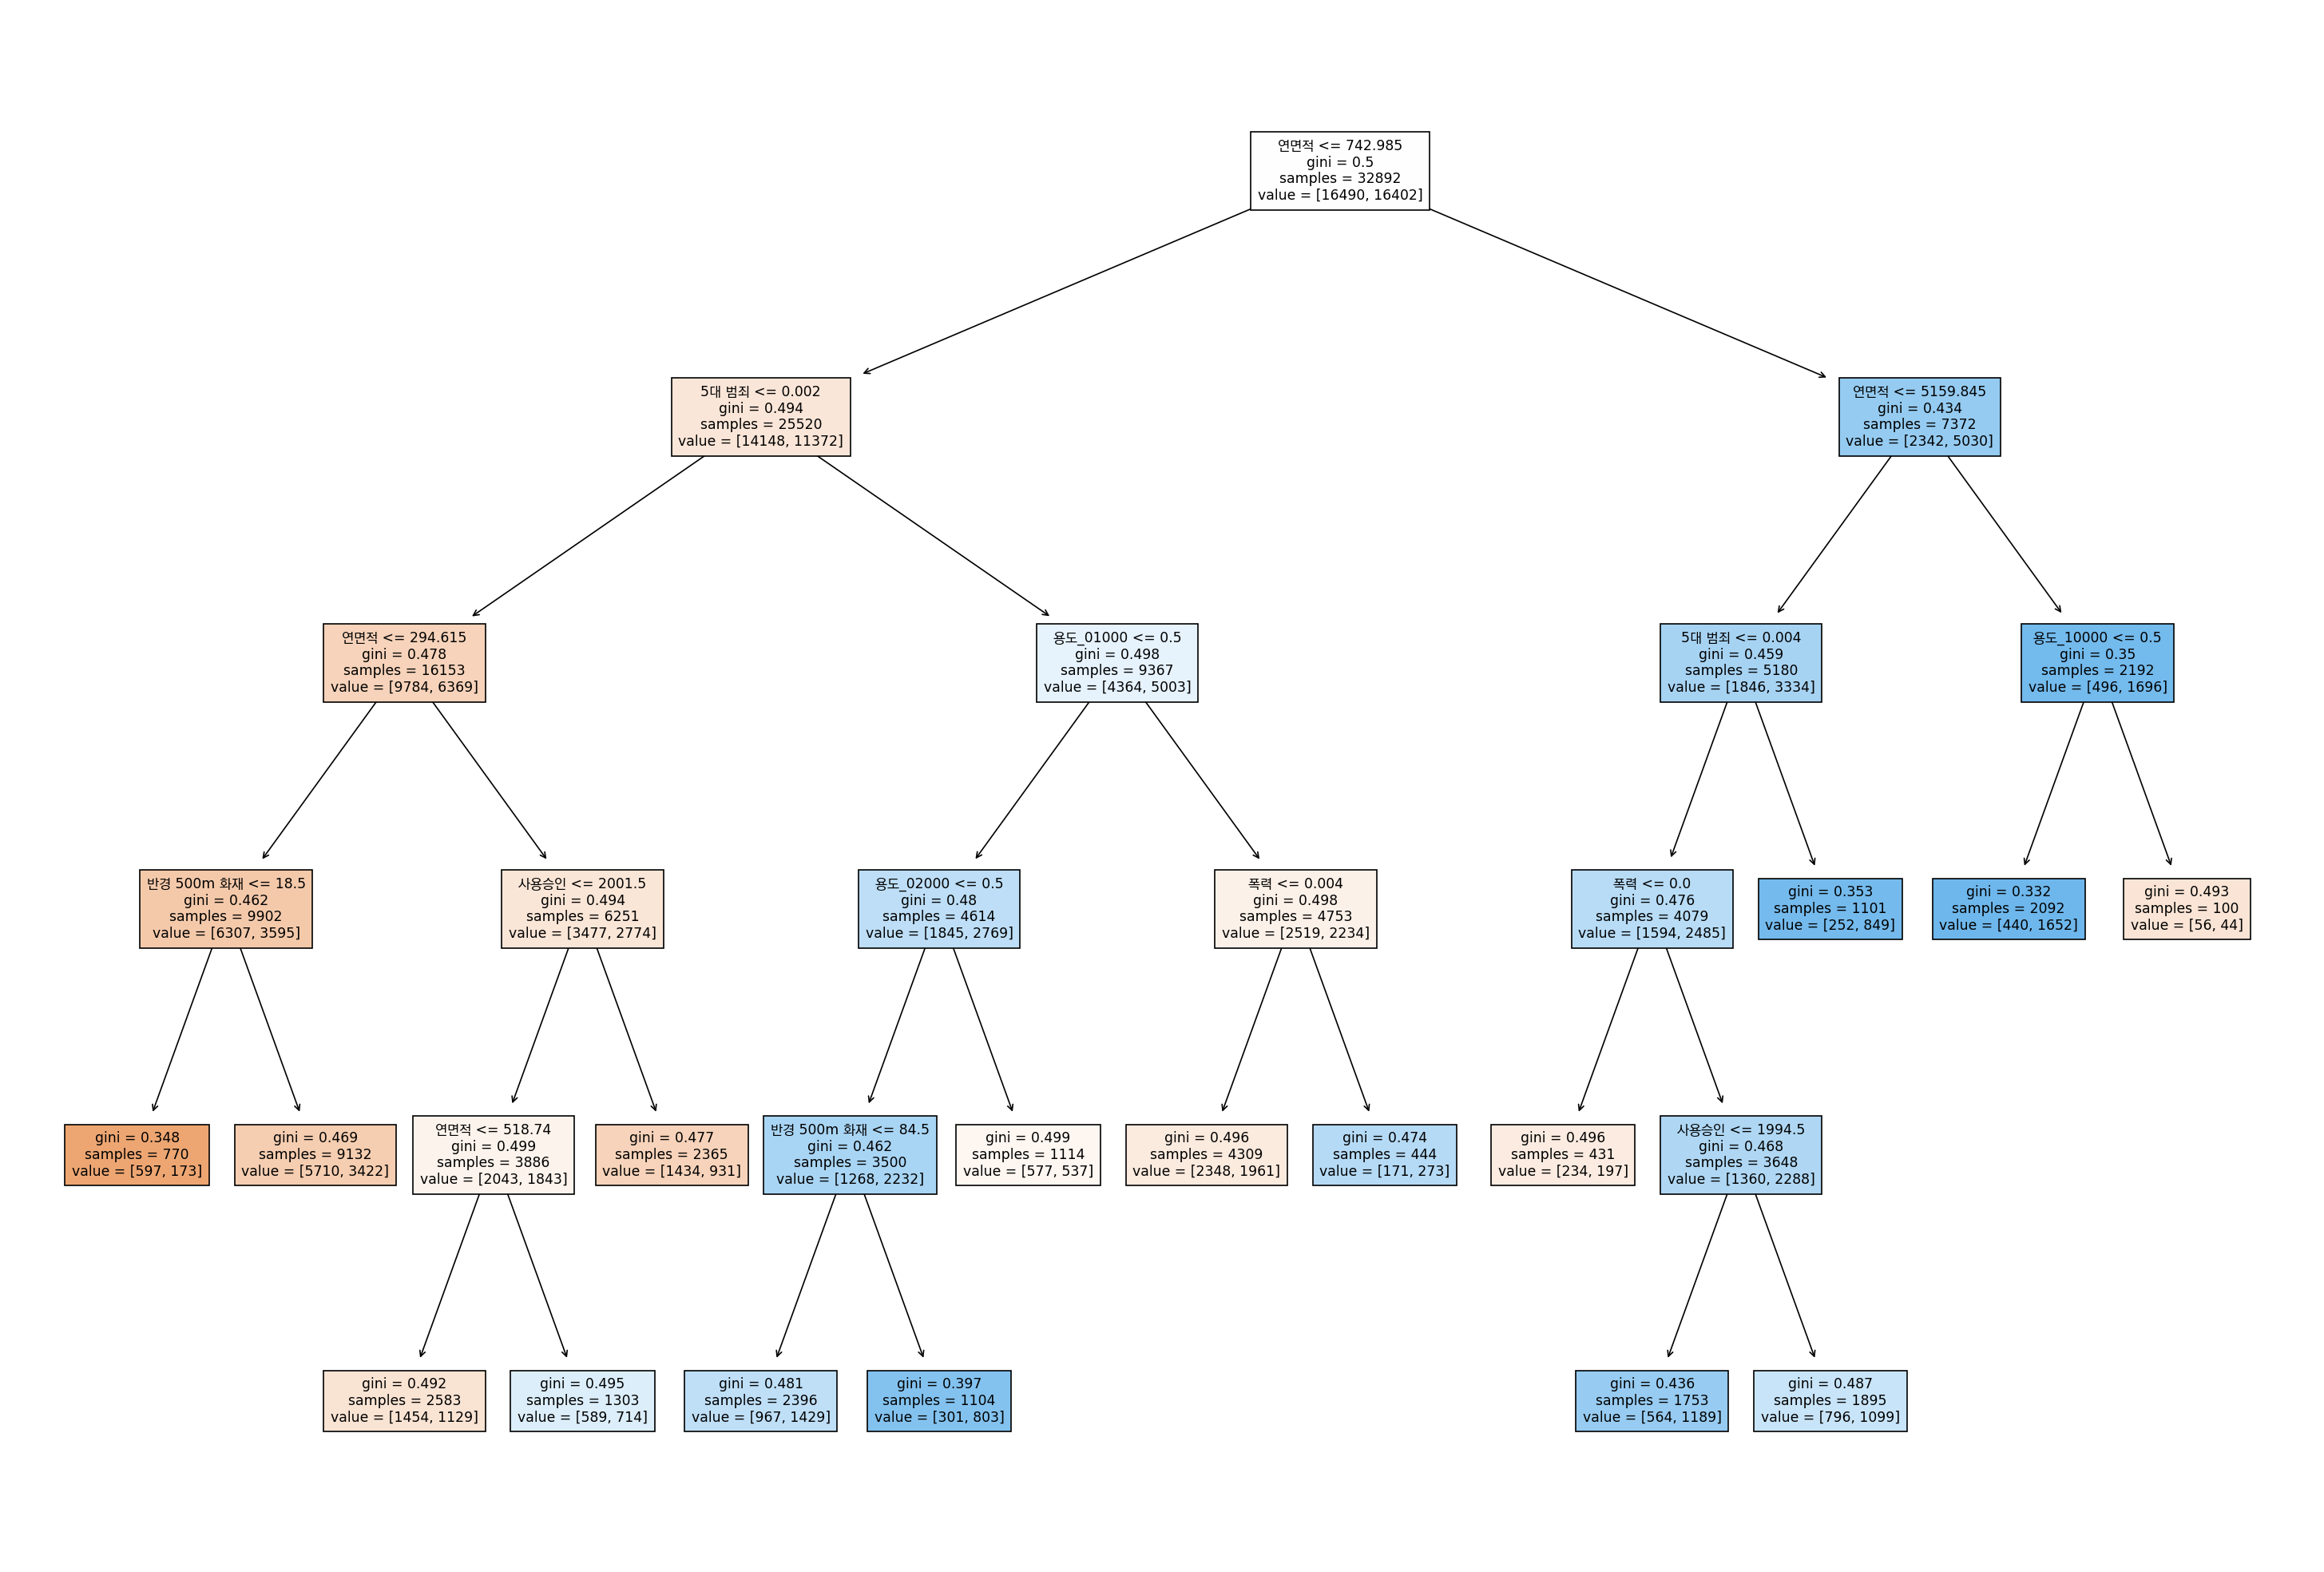

In [161]:
plt.figure(dpi=600)
plot_tree(clf_best, feature_names=labels, filled=True)
plt.savefig("output/tree.svg")
plt.savefig("output/tree.png")


- 용도_01000: 단독주택(대분류)
- 용도_02000: 공동주택
- 용도_10000: 교육연구시설

주황: 화재 미발생 비율 높음, 파랑: 화재 발생 비율 높음

화재 발생 비율 높은 순으로:

- 연면적 5,160m² 이상, 교육연구시설 제외 (지니 0.332)
- 연면적 743m² 이상 5,160m² 미만, 5대 범죄 발생률 0.004건/m² 이상 (지니 0.353)
- 연면적 743m² 미만, 5대 범죄 발생률 0.002건/m² 이상, 단독주택(대분류) 및 공동주택 제외, 반경 500m 화재 발생 85건 이상 (지니 0.397)
- 연면적 743m² 이상 5,160m² 미만, 5대 범죄 발생률 0.004건/m² 미만, 폭력 범죄 발생 있음, 사용승인 1994년 이전 (지니 0.436)
- 연면적 743m² 미만, 단독주택(대분류), 폭력 범죄 발생률 0.004건/m² 이상(지니 0.474)


In [117]:
df[df.set == "train"].fire_1.value_counts()


0.0    16490
1.0    16402
Name: fire_1, dtype: int64

In [127]:
f = df_orig.fire
round(f.mean() * 100, 1), f.value_counts()


(3.8,
 0    519631
 1     20480
 Name: fire, dtype: int64)

전체 건축물 화재 발생률 3.8%

In [129]:
c1 = df_orig[(df_orig.A14 >= 5160) & (df_orig.A8 != "10000")].fire
round(c1.mean() * 100, 1), c1.value_counts()


(12.0,
 0    15265
 1     2080
 Name: fire, dtype: int64)

연면적 5,160m² 이상, 교육연구시설 제외: 12.0%

In [131]:
c2 = df_orig[
    (df_orig.A14 >= 743) & (df_orig.A14 < 5160) & (df_orig.crime_zone >= 0.004)
].fire
round(c2.mean() * 100, 1), c2.value_counts()


(10.7,
 0    9578
 1    1142
 Name: fire, dtype: int64)

연면적 743m² 이상 5,160m² 미만, 5대 범죄 발생률 0.004건/m² 이상: 10.7%

In [136]:
c3 = df_orig[
    (df_orig.A14 < 743)
    & (df_orig.crime_zone >= 0.002)
    & (df_orig.A8 != "01000")
    & (df_orig.A8 != "02000")
    & (df_orig.fire_500m_cnt >= 85)
].fire
round(c3.mean() * 100, 1), c3.value_counts()


(8.1,
 0    11554
 1     1012
 Name: fire, dtype: int64)

연면적 743m² 미만, 5대 범죄 발생률 0.002건/m² 이상, 단독주택(대분류) 및 공동주택 제외, 반경 500m 화재 발생 85건 이상: 8.1%


In [138]:
c4 = df_orig[
    (df_orig.A14 >= 743)
    & (df_orig.A14 < 5160)
    & (df_orig.crime_zone < 0.004)
    & (df_orig.pr_zone > 0)
    & (df_orig.year <= 1994)
].fire
round(c4.mean() * 100, 1), c4.value_counts()


(6.9,
 0    20052
 1     1495
 Name: fire, dtype: int64)

연면적 743m² 이상 5,160m² 미만, 5대 범죄 발생률 0.004건/m² 미만, 폭력 범죄 발생 있음, 사용승인 1994년 이전: 6.9%

In [139]:
c5 = df_orig[
    (df_orig.A14 < 743)
    & (df_orig.A8 == "01000")
    & (df_orig.pr_zone >= 0.004)
].fire
round(c5.mean() * 100, 1), c5.value_counts()


(4.8,
 0    6941
 1     347
 Name: fire, dtype: int64)

연면적 743m² 미만, 단독주택(대분류), 폭력 범죄 발생률 0.004건/m² 이상: 4.8%

In [158]:
df_p = pd.DataFrame(
    [(x.count(), x.mean()) for x in [f, c1, c2, c3, c4, c5]], columns=["count", "risk"]
)
df_p["share"] = df_p["count"] / f.count() * 100
df_p["rr"] = df_p["risk"] / f.mean()
df_p


,count,risk,share,rr
0,540111,0.037918,100.000000,1.000000
1,17345,0.119919,3.211377,3.162584
2,10720,0.106530,1.984777,2.809470
3,12566,0.080535,2.326559,2.123912
4,21547,0.069383,3.989365,1.829816
5,7288,0.047613,1.349352,1.255666


In [157]:
df_p.loc[1:, "share"].sum()

12.861430335616197

최대 3.2배에서 1.3배 사이의 상대위험도를 보이는
(전체 집단에 비하여 화재 발생 위험이 그만큼 높은) 5개 유형을 발견함.
이들 유형에는 총 약 12.9%의 건축물이 포함됨.

5개 유형 중 4개 유형에서 범죄 발생률을 반영하여,
건축물 관련 정보 연계의 필요성을 입증함.

앞으로 더 많은 정보를 연계할수록 빅데이터와 기계학습 방법론의 활용 가치가 더욱 높아질 것으로 예상됨.